# Ch.02 "Training Simple Machine Learning Algorithms for Classification"

## The perceptron learning rule

1. Initialize the weights and bias unit to 0 or small random numbers
2. For each training example, $x^{(i)}$:

    a. Compute the output value $\hat{y}^{ (i)}$.
   
    b. Update the weights and bias unit

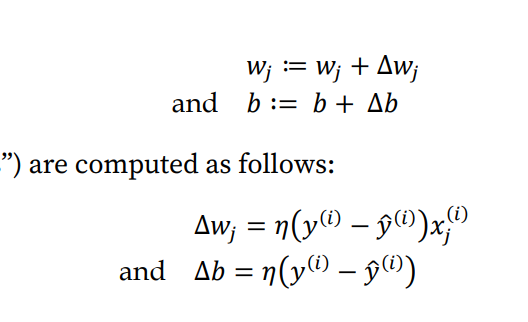

In [1]:
from IPython.display import Image
Image('./Images/update_w_b.PNG')

## Implementing a perceptron learning algorithm in Python

In [2]:
import numpy as np

class Perceptron:
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    
    def fit(self, X, y):
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            
            for xi, target in zip(X, y):
                update = self.eta* (target - self.predict(xi))
                self.w_ += update *xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    
    def net_input(self, X):
        return np.dot(X,self.w_) + self.b_
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
          